# **Overfitting `vs.` Underfitting**

## 1. Setup and Baseline Model

In [1]:
%%time
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping

# ignore warnings in the output
import warnings
warnings.filterwarnings("ignore")

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Define a simple model
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model = create_model()

# Train the baseline model
history_baseline = model.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)


Epoch 1/10


2024-02-12 14:10:01.167201: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Max
2024-02-12 14:10:01.167221: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-02-12 14:10:01.167227: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-02-12 14:10:01.167254: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-12 14:10:01.167268: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


   9/1500 [..............................] - ETA: 9s - loss: 151.4780 - accuracy: 0.2465  

2024-02-12 14:10:01.441435: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1492/1500 [============================>.] - ETA: 0s - loss: 18.0637 - accuracy: 0.8354

2024-02-12 14:10:09.474428: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 18.0957 - accuracy: 0.8354 - val_loss: 17.8454 - val_accuracy: 0.8574
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 19.0259 - accuracy: 0.8620 - val_loss: 16.7522 - val_accuracy: 0.8884
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 23.7100 - accuracy: 0.8626 - val_loss: 24.4048 - val_accuracy: 0.8781
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 26.5321 - accuracy: 0.8688 - val_loss: 25.5547 - val_accuracy: 0.8852
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 30.2466 - accuracy: 0.8690 - val_loss: 29.0320 - val_accuracy: 0.8862
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 33.7568 - accuracy: 0.8700 - val_loss: 33.3120 - val_accuracy: 0.8917
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 38.4817 - accuracy: 0.8711 - val_loss: 52.8512 - val_accura

## 2. Run model on Normalized Data

Epoch 1/10
  21/1500 [..............................] - ETA: 7s - loss: 1.6712 - accuracy: 0.4821

2024-02-12 14:11:29.860713: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1490/1500 [============================>.] - ETA: 0s - loss: 0.3850 - accuracy: 0.8899

2024-02-12 14:11:37.589309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3846 - accuracy: 0.8901 - val_loss: 0.2829 - val_accuracy: 0.9206
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3149 - accuracy: 0.9122 - val_loss: 0.2942 - val_accuracy: 0.9176
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3176 - accuracy: 0.9120 - val_loss: 0.3004 - val_accuracy: 0.9199
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3240 - accuracy: 0.9112 - val_loss: 0.3252 - val_accuracy: 0.9122
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3306 - accuracy: 0.9100 - val_loss: 0.3129 - val_accuracy: 0.9205
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3391 - accuracy: 0.9104 - val_loss: 0.3379 - val_accuracy: 0.9132
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3507 - accuracy: 0.9079 - val_loss: 0.3624 - val_accuracy: 0.9073
Epo

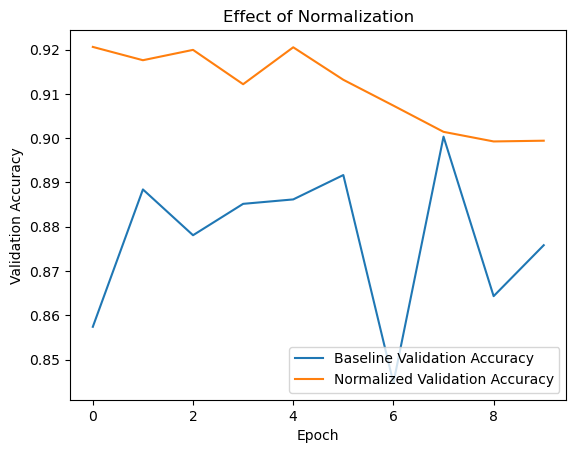

CPU times: user 1min 16s, sys: 36.6 s, total: 1min 52s
Wall time: 1min 29s


In [2]:
%%time
# laod and normalize the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define a model for normalized data
def create_model_with_norm_data():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_norm_data = create_model_with_norm_data()

# Train the baseline model
history_norm_data = model_with_norm_data.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# plot the effect of normalization
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
plt.plot(history_norm_data.history['val_accuracy'], label = 'Normalized Validation Accuracy')
plt.title('Effect of Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

## 3. Adding Dropout
Now, let's modify the model to include dropout and observe its effect.

Epoch 1/10
   1/1500 [..............................] - ETA: 6:59 - loss: 2.4556 - accuracy: 0.0938

2024-02-12 14:13:59.971703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.4793 - accuracy: 0.8573

2024-02-12 14:14:08.266671: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 10s 6ms/step - loss: 0.4793 - accuracy: 0.8573 - val_loss: 0.3120 - val_accuracy: 0.9143
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4100 - accuracy: 0.8851 - val_loss: 0.2960 - val_accuracy: 0.9195
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4227 - accuracy: 0.8846 - val_loss: 0.2963 - val_accuracy: 0.9195
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4245 - accuracy: 0.8855 - val_loss: 0.3105 - val_accuracy: 0.9147
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4409 - accuracy: 0.8813 - val_loss: 0.3291 - val_accuracy: 0.9115
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4490 - accuracy: 0.8798 - val_loss: 0.3275 - val_accuracy: 0.9101
Epoch 7/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.4630 - accuracy: 0.8780 - val_loss: 0.3351 - val_accuracy: 0.9104
E

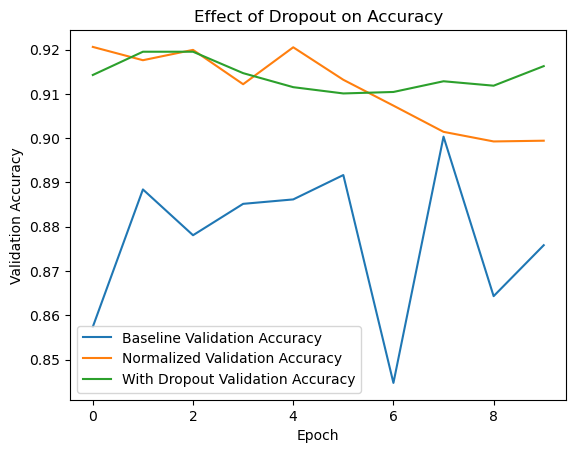

In [3]:
# Define a model with dropout
def create_model_with_dropout():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Adding dropout
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

model_with_dropout = create_model_with_dropout()

# Train the model with dropout
history_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of dropout
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.title('Effect of Dropout on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()


## 4. Early Stopping
Finally, we will use early stopping to stop training when the validation loss starts to increase.

Epoch 1/10
  20/1500 [..............................] - ETA: 7s - loss: 1.6996 - accuracy: 0.4375

2024-02-12 14:17:10.911956: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.3881 - accuracy: 0.8892

2024-02-12 14:17:18.748802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.3879 - accuracy: 0.8893 - val_loss: 0.2926 - val_accuracy: 0.9172
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3174 - accuracy: 0.9108 - val_loss: 0.2913 - val_accuracy: 0.9208
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3158 - accuracy: 0.9121 - val_loss: 0.2889 - val_accuracy: 0.9218
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3218 - accuracy: 0.9113 - val_loss: 0.3210 - val_accuracy: 0.9141
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3310 - accuracy: 0.9103 - val_loss: 0.3136 - val_accuracy: 0.9178
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3411 - accuracy: 0.9102 - val_loss: 0.3791 - val_accuracy: 0.9024


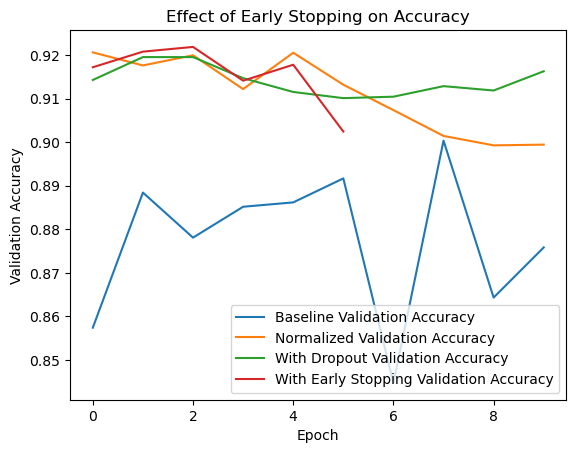

In [4]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

model_with_es = create_model_with_norm_data()

# train with early stop
history_es = model_with_es.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1, callbacks=[early_stopping])

# plot the effect of early stopping
plt.plot(history_baseline.history['val_accuracy'], label='Baseline Validation Accuracy')
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_es.history['val_accuracy'], label='With Early Stopping Validation Accuracy')
plt.title('Effect of Early Stopping on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## 5. L1/L2 Regularization
L1 and L2 regularization are two common regularization techniques that can be used to reduce overfitting.

L1 in Keras: `kernel_regularizer=regularizers.l1(0.001)` 
L2 in Keras: `kernel_regularizer=regularizers.l2(0.001)`

L1 changes the loss function by adding the sum of the absolute weights to it. L2 changes the loss function by adding the sum of the squared weights to it. 
- `L1` make zero some of the weights. 
- `L2` make the weights small.

Epoch 1/10


2024-02-12 14:22:56.253908: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.6947 - accuracy: 0.8524

2024-02-12 14:23:05.692503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 11s 7ms/step - loss: 0.6941 - accuracy: 0.8525 - val_loss: 0.5035 - val_accuracy: 0.9094
Epoch 2/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6037 - accuracy: 0.8836 - val_loss: 0.5120 - val_accuracy: 0.9156
Epoch 3/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6308 - accuracy: 0.8819 - val_loss: 0.5556 - val_accuracy: 0.9081
Epoch 4/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.6719 - accuracy: 0.8797 - val_loss: 0.5846 - val_accuracy: 0.9119
Epoch 5/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7055 - accuracy: 0.8783 - val_loss: 0.6209 - val_accuracy: 0.9103
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7372 - accuracy: 0.8778 - val_loss: 0.6649 - val_accuracy: 0.9040
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.7709 - accuracy: 0.8774 - val_loss: 0.6896 - val_accuracy: 0.9

2024-02-12 14:24:38.941891: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.5070 - accuracy: 0.8566

2024-02-12 14:24:51.660982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 15s 10ms/step - loss: 0.5069 - accuracy: 0.8567 - val_loss: 0.3222 - val_accuracy: 0.9147
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4397 - accuracy: 0.8866 - val_loss: 0.3354 - val_accuracy: 0.9168
Epoch 3/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4608 - accuracy: 0.8859 - val_loss: 0.3539 - val_accuracy: 0.9209
Epoch 4/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.4836 - accuracy: 0.8842 - val_loss: 0.3822 - val_accuracy: 0.9158
Epoch 5/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.5178 - accuracy: 0.8824 - val_loss: 0.4034 - val_accuracy: 0.9183
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5379 - accuracy: 0.8838 - val_loss: 0.4299 - val_accuracy: 0.9155
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5650 - accuracy: 0.8811 - val_loss: 0.4553 - val_accura

2024-02-12 14:27:10.069982: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1499/1500 [============================>.] - ETA: 0s - loss: 0.7007 - accuracy: 0.8516

2024-02-12 14:27:23.599703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 10ms/step - loss: 0.7005 - accuracy: 0.8516 - val_loss: 0.5016 - val_accuracy: 0.9103
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.6077 - accuracy: 0.8799 - val_loss: 0.5268 - val_accuracy: 0.9076
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.6362 - accuracy: 0.8789 - val_loss: 0.5375 - val_accuracy: 0.9138
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.6698 - accuracy: 0.8785 - val_loss: 0.5877 - val_accuracy: 0.9074
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.6988 - accuracy: 0.8786 - val_loss: 0.6066 - val_accuracy: 0.9092
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.7296 - accuracy: 0.8779 - val_loss: 0.6292 - val_accuracy: 0.9115
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.7535 - accuracy: 0.8785 - val_loss: 0.6618 - val_accura

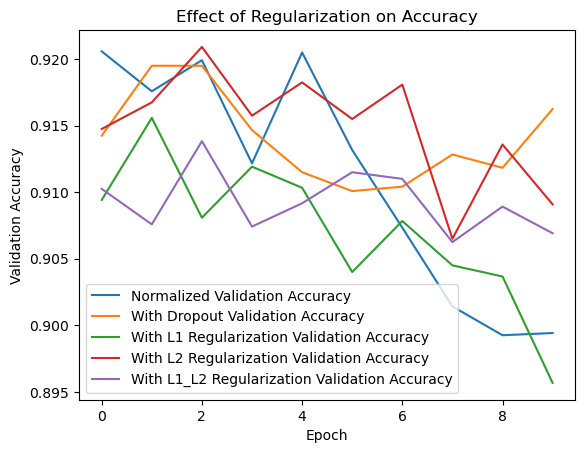

In [5]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l1, l2, l1_l2
import matplotlib.pyplot as plt

# Define a model with L1 regularization
def create_model_with_l1():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1(0.0001)),  # L1 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Define a model with L2 regularization
def create_model_with_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),  # L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# should we combine them both?
# Define a model with L1_L2 (combined) regularization
def create_model_with_l1_l2():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),  # L1_L2 regularization
        Dropout(0.5), # Adding dropout which will also be regularized by L1_L2
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare and train the models
model_with_l1 = create_model_with_l1()
history_l1 = model_with_l1.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l2 = create_model_with_l2()
history_l2 = model_with_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

model_with_l1_l2 = create_model_with_l1_l2()
history_l1_l2 = model_with_l1_l2.fit(x_train, y_train, epochs=10, validation_split=0.2, verbose=1)

# Plotting the effect of regularization
# plot line for normalized data
plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

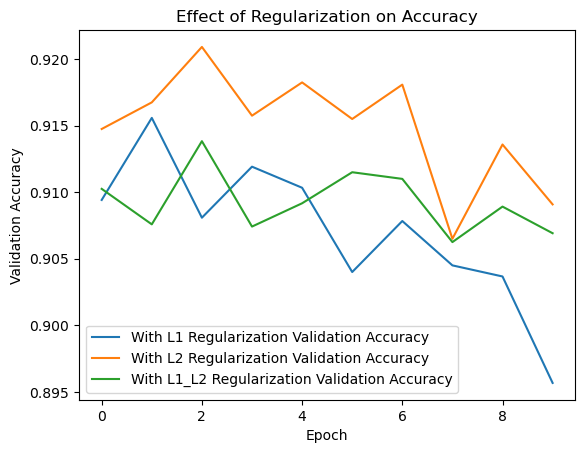

In [6]:
# Plotting the effect of regularization
# plot line for normalized data
# plt.plot(history_norm_data.history['val_accuracy'], label='Normalized Validation Accuracy')
# plt.plot(history_dropout.history['val_accuracy'], label='With Dropout Validation Accuracy')
plt.plot(history_l1.history['val_accuracy'], label='With L1 Regularization Validation Accuracy')
plt.plot(history_l2.history['val_accuracy'], label='With L2 Regularization Validation Accuracy')
plt.plot(history_l1_l2.history['val_accuracy'], label='With L1_L2 Regularization Validation Accuracy')
plt.title('Effect of Regularization on Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

## 6. K-fold cross validation

**`k-fold cross-validation in TensorFlow`** requires a bit more manual setup compared to libraries like scikit-learn, which offer built-in k-fold cross-validation functions. TensorFlow does not have a direct function for k-fold cross-validation, but you can achieve this by manually splitting your dataset into k folds and then training and evaluating your model on each fold.

Below is an example code that demonstrates how to perform k-fold cross-validation with the MNIST dataset in TensorFlow. This example uses a simple neural network similar to the ones discussed previously.

Epoch 1/10
  14/1500 [..............................] - ETA: 12s - loss: 1.9456 - accuracy: 0.3504

2024-02-12 14:38:50.014312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 0.3808 - accuracy: 0.8909

2024-02-12 14:39:02.748247: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 10ms/step - loss: 0.3807 - accuracy: 0.8910 - val_loss: 0.3164 - val_accuracy: 0.9110
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3097 - accuracy: 0.9129 - val_loss: 0.3264 - val_accuracy: 0.9067
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3120 - accuracy: 0.9142 - val_loss: 0.3588 - val_accuracy: 0.8992
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3159 - accuracy: 0.9137 - val_loss: 0.3593 - val_accuracy: 0.8990
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3266 - accuracy: 0.9120 - val_loss: 0.3652 - val_accuracy: 0.9068
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3348 - accuracy: 0.9111 - val_loss: 0.3833 - val_accuracy: 0.8988
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3430 - accuracy: 0.9101 - val_loss: 0.4323 - val_accura

2024-02-12 14:41:33.916309: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - ETA: 0s - loss: 0.3753 - accuracy: 0.8954

2024-02-12 14:41:47.081648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 10ms/step - loss: 0.3753 - accuracy: 0.8954 - val_loss: 0.3178 - val_accuracy: 0.9078
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3114 - accuracy: 0.9140 - val_loss: 0.3264 - val_accuracy: 0.9054
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3101 - accuracy: 0.9151 - val_loss: 0.3210 - val_accuracy: 0.9105
Epoch 4/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3154 - accuracy: 0.9152 - val_loss: 0.3357 - val_accuracy: 0.9087
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3230 - accuracy: 0.9138 - val_loss: 0.3759 - val_accuracy: 0.8988
Epoch 6/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3273 - accuracy: 0.9129 - val_loss: 0.3797 - val_accuracy: 0.9002
Epoch 7/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3439 - accuracy: 0.9098 - val_loss: 0.3745 - val_accura

2024-02-12 14:44:09.887720: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1495/1500 [============================>.] - ETA: 0s - loss: 0.3798 - accuracy: 0.8932

2024-02-12 14:44:22.878680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 10ms/step - loss: 0.3794 - accuracy: 0.8934 - val_loss: 0.2989 - val_accuracy: 0.9146
Epoch 2/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3132 - accuracy: 0.9124 - val_loss: 0.3169 - val_accuracy: 0.9110
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3139 - accuracy: 0.9124 - val_loss: 0.3250 - val_accuracy: 0.9127
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3194 - accuracy: 0.9130 - val_loss: 0.3459 - val_accuracy: 0.9043
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3266 - accuracy: 0.9122 - val_loss: 0.3461 - val_accuracy: 0.9063
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3341 - accuracy: 0.9100 - val_loss: 0.3750 - val_accuracy: 0.9032
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3458 - accuracy: 0.9091 - val_loss: 0.3638 - val_accura

2024-02-12 14:46:50.962701: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1495/1500 [============================>.] - ETA: 0s - loss: 0.3753 - accuracy: 0.8933

2024-02-12 14:47:04.670353: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 17s 11ms/step - loss: 0.3755 - accuracy: 0.8934 - val_loss: 0.3144 - val_accuracy: 0.9158
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3110 - accuracy: 0.9125 - val_loss: 0.3405 - val_accuracy: 0.9085
Epoch 3/10
1500/1500 [==============================] - 16s 10ms/step - loss: 0.3120 - accuracy: 0.9131 - val_loss: 0.3494 - val_accuracy: 0.9061
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3190 - accuracy: 0.9124 - val_loss: 0.3678 - val_accuracy: 0.9007
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3229 - accuracy: 0.9122 - val_loss: 0.3641 - val_accuracy: 0.9063
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3347 - accuracy: 0.9115 - val_loss: 0.4338 - val_accuracy: 0.8927
Epoch 7/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3489 - accuracy: 0.9086 - val_loss: 0.4153 - val_accura

2024-02-12 14:49:32.212151: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1497/1500 [============================>.] - ETA: 0s - loss: 0.3738 - accuracy: 0.8914

2024-02-12 14:49:45.508330: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 16s 11ms/step - loss: 0.3734 - accuracy: 0.8916 - val_loss: 0.3265 - val_accuracy: 0.9100
Epoch 2/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3097 - accuracy: 0.9133 - val_loss: 0.3289 - val_accuracy: 0.9118
Epoch 3/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3074 - accuracy: 0.9146 - val_loss: 0.3423 - val_accuracy: 0.9133
Epoch 4/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3155 - accuracy: 0.9132 - val_loss: 0.3616 - val_accuracy: 0.9021
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3203 - accuracy: 0.9133 - val_loss: 0.3767 - val_accuracy: 0.9047
Epoch 6/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.3284 - accuracy: 0.9136 - val_loss: 0.3723 - val_accuracy: 0.9025
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3419 - accuracy: 0.9101 - val_loss: 0.3838 - val_accura

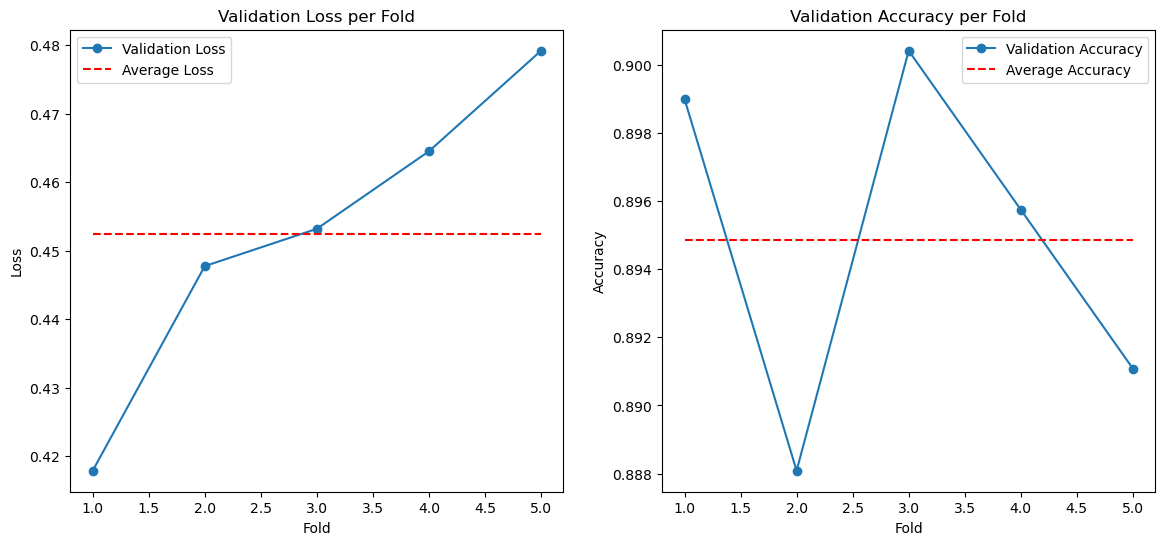

CPU times: user 12min 6s, sys: 3min 22s, total: 15min 29s
Wall time: 13min 24s


In [8]:
%%time
import numpy as np
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train = to_categorical(y_train, 10)  # One-hot encode labels

# Define a simple model architecture function
def create_model():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Prepare for k-fold cross-validation
k = 5  # Number of folds
kf = KFold(n_splits=k, shuffle=True)

# Arrays to store scores
fold_idx = 1
scores = []

for train_index, val_index in kf.split(x_train):
    # Split data
    x_train_fold, x_val_fold = x_train[train_index], x_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]
    
    # create a model
    model_kfold_cv = create_model()
    
    # Train model
    history_kfold_cv = model_kfold_cv.fit(x_train_fold, y_train_fold, epochs=10, validation_data=(x_val_fold, y_val_fold), verbose=1)
    
    # Append the last score from the history
    scores.append((history_kfold_cv.history['val_loss'][-1], history_kfold_cv.history['val_accuracy'][-1]))

# Calculate and print average performance across all folds
average_loss, average_accuracy = np.mean(scores, axis=0)
print(f'\nK-Fold Validation Results:\nAverage Loss: {average_loss}, Average Accuracy: {average_accuracy}')

# Plotting
folds = range(1, k + 1)
val_losses, val_accuracies = zip(*scores)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(folds, val_losses, 'o-', label='Validation Loss')
plt.plot(folds, [average_loss] * k, 'r--', label='Average Loss')
plt.title('Validation Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(folds, val_accuracies, 'o-', label='Validation Accuracy')
plt.plot(folds, [average_accuracy] * k, 'r--', label='Average Accuracy')
plt.title('Validation Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

This code performs the following steps:
1. Normalizes the data and one-hot encodes the labels.
2. Defines a simple neural network model inside a function so that a fresh model can be created for each fold.
3. Uses `KFold` from `sklearn.model_selection` to generate train/validation splits.
4. Trains a new model instance on each train fold and evaluates it on the corresponding validation fold.
5. Calculates and prints the average loss and accuracy across all folds at the end.

Remember, k-fold cross-validation can be computationally expensive since it involves training and evaluating k separate models. Adjust the number of epochs, model complexity, or the dataset size as necessary to manage the computational load.